# Microtask: Explore Toolhub Data

In [1]:
import json  # will let us print out the response in a prettier format
import requests  # necessary to make API calls
import datetime # for Task #2
import matplotlib.pyplot as plt # for data visualization

# configure API session parameters

# user_agent helps identify the request if there is an issue and is best practice
REQUEST_LABEL = 'Outreachy 25 Toolhub Microtask'

# NOTE: it's considered best practice to include contact info in user agents
USER_INFO = 'Phabricator user: NicoleLBee'

headers = {'User-Agent': f'{REQUEST_LABEL} - {USER_INFO}'}

TOOLS_API_ENDPOINT = "https://toolhub.wikimedia.org/api/tools"
SEARCH_API_ENDPOINT = "https://toolhub.wikimedia.org/api/search/tools"

## TASK SET 1

In [2]:
# TODO: Write a function that takes a tool name,
# and returns all the missing fields as a list.

def list_missing_fields(target):
    """Takes in a tool name (string), queries the API, returns list of missing fields"""
    url = f'{TOOLS_API_ENDPOINT}/{target}/'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        api_response = response.json()
        empty_fields = []
        for key in api_response["annotations"]:
            # If the tool has not been deprecated, then the absence of a value for "replaced_by" is irrelevant
            # What I mean is, there is no point in looking for a value which necessarily won't exist.
            # Its absence is expected.
            if key == "replaced_by" and (api_response["deprecated"] == False or api_response["annotations"]["deprecated"] == False):
                 continue
            # Although the following lines are unwieldy, a piece of information is missing only if it is absent in both the Core and Annotations layers
            # Therefore I need to check both sources.
            # This only works if the key exists in both places, so I check for that first.
            elif (key in api_response):
                    if (api_response[key] == [] or api_response[key] == None) and (api_response["annotations"][key] == [] or api_response["annotations"][key] == None):
                        empty_fields.append(key)
            elif api_response["annotations"][key] == [] or api_response["annotations"][key] == None:
                empty_fields.append(key)
        return empty_fields
    else:
        print(response.status_code)


### TESTING TASK 1:  

Examining the output of a fetch request made on the API documentation page, I can see that, within the "annotations" dict of pywikibot, the following fields have no value:
 ```
    "wikidata_qid": null,
    "replaced_by": null,
    "for_wikis": [],
    "icon": null,
    "tool_type": null,
    "repository": null,
    "api_url": null,
    "user_docs_url": [],
    "feedback_url": [],
    "privacy_policy_url": [],
    "translate_url": null,
    "bugtracker_url": null
```

However, most of these have values contained within the Core tool info.  If I eliminate the ones that are assigned values in the Core tool info, and eliminate "replaced_by" (since the tool is not deprecated, the absence of a value here is expected), I'm left with the following empty fields:

```
wikidata_qid  
api_url  
feedback_url  
privacy_policy_url
```

So I would expect that calling `list_missing_fields("pywikibot")` would return the following list: `['wikidata_quid', 'api_url', 'feedback_url', 'privacy_policy_url']`

In [3]:
list_missing_fields("pywikibot")

['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']

### TESTING TASK 1: PART 2

I'll try another: `mm_wikidata_todo`  When I plug the toolname into the code block found at the beginning of the document, I can see that the following fields in the "annotations" dict have no value:  

```
  "annotations": {
    "wikidata_qid": null,
    "replaced_by": null,
    "for_wikis": [],
    "icon": null,
    "api_url": null,
    "user_docs_url": [],
    "feedback_url": [],
    "privacy_policy_url": [],
    "translate_url": null,
  },
  ```

Checking against the relevant Core values, 

```
 "deprecated": false,
  "replaced_by": null,
  "experimental": false,
  "for_wikis": [],
  "icon": null,
  "license": null,
  "sponsor": [],
  "available_ui_languages": [],
  "technology_used": [],
  "tool_type": null,
  "api_url": null,
  "user_docs_url": [],
  "feedback_url": [],
  "privacy_policy_url": [],
  "translate_url": null,
  "bugtracker_url": null,
  ```
  
In other words, the following fields have no value in either Annotations or the Core:
  ```
  wikidata_qid,
  replaced_by,
  for_wikis,
  icon,
  api_url,
  user_docs_url,
  feedback_url,
  privacy_policy_url,
  translate_url
  ```
  
  Considering that my function would eliminate `replaced_by`,  I would expect that `list_missing_fields("mm_wikidata_todo")` would return the following list:
  
  ```
  [ 'wikidata_qid',
  'for_wikis',
  'icon',
  'api_url',
  'user_docs_url',
  'feedback_url',
  'privacy_policy_url',
  'translate_url' ]
  ```

In [4]:
list_missing_fields("mm_wikidata_todo")

['wikidata_qid',
 'for_wikis',
 'icon',
 'api_url',
 'developer_docs_url',
 'user_docs_url',
 'feedback_url',
 'privacy_policy_url',
 'translate_url']

### **TODO**: Consider all the fields that are editable. ##
1. Should they all be considered equally valuable from the point of view of a user searching for a tool to use in their workflows?
2. Or a user that is looking for a tool to contribute to? Why or why not?
3. Which are, according to you, the three most valuable fields? Which are the least valuable? Explain your reasoning.

#### Answers

1. In my opinion, they would certainly not be equally valuable from the PoV of a user searching for a tool to use.  A user who wants to make use of a tool would be most interested in the context in which the tool would be used (i.e., "tool_type") or in documentation pertaining to the tool's use (e.g., "user_docs_url").

2. On the other hand, a user who was looking to make a contribution would be more interested in fields such as "repository," "developer_docs_url," or "bug_tracker_url."  Users will seek information that will assist them in achieving their goals, so naturally users with different goals (in this case, working *with* a tool vs. working *on* a tool) will be interested in different pieces of information.

3. I would like include "replaced_by" in both the most *and* least valuable lists, simply because if the tool isn't depreciated, then the value of the field is of no importance whatsoever, but if the tool *is* depreciated, then it is *extremely* important.  (I know I keep banging on about this field.)  But since that feels a bit like cheating, I'll consider "replaced_by" a *special* case and list the following:

**Most valuable**
1. repository: A well-written repository would likely contain information pertaining to the following fields as well: "developer_docs_url", "user_docs_url", "feedback_url", "deprecated" and "bugtracker_url."  In this way one entry can cover multiple bases, as it were.  If we had one thing to encourage contributors to this project to look for and add, it would be (in my opinion) a repository.

2. deprecated:  This field provides critical information: a non-functional tool is of no use to a user and a contributor's time would be better spent working on the replacement tool

3. user_docs_url: What is the use of having access to a tool if you can't figure out how to use it? 


**Least valuable**
1.  icon: This is purely cosmetic and contains no useful information either for a user or a contributor.

2.  wikidata_qid: A string for use with the Wikidata query service, which I'm guessing would be used to cross-reference information, but I cannot find any explanation about how this would be generated.  But doing some digging, it seems that  someone would have to make a Wikidata entry for the tool, which would then generate the qid, which could then be manually attached to the tool on Toolhub.  If that's the case, then it seems like it would be a lot to ask of a random volunteer.  (Idea:  some kind of cross-pollination between Wikidata and Toolhub, whereby when a new tool is added, a new entry is automatically created on Wikidata.  Or, alternately, if a new entry is made on Wikidata, could the associated tool be automatically updated?  Would that be possible?)  

    Looking into it a bit more, I found, for instance, that "pywikibot" has a Wikimedia entry that contains more information than its Toolhub entry.  Interesting.  But since there's no guarantee that a given tool would have an extensive Wikimedia entry, I still think that the value of this field is not particularly valuable.

3.  translate_url: "A link to the tool's translation interface."  I am honestly not sure what this means.  A link to translated documentation?  Does it duplicate "available_ui_languages"?  It is unclear, and thus not particularly useful.

## TASK SET 2

### TODO: Write a function that returns a dict where the keys are tool names, and the values are tuples:
` {<tool name>: (<number of missing fields>, <days since the tool was last edited>)}.`


Steps: 
1. Make a request to the /api/tools endpoint, gather the values from the "results" dict: for each entry, I'll need the value of "name" and "modified_date" (OR "created_date", if it's never been modified
2. Run each entry through a modified version of the the function that I wrote above and return the length of the resulting dict to fill the `<number of missing fields>` requirement.
3. Pass the date through a function that will calculate the difference from today's date, and return that figure.
4. Push all of that info to the dict.

In [5]:
# First I'll rewrite "list_missing_fields()" from Task 1 to serve as a callback function.  
# This time it will only return the length of the list, e.g. the number of empty fields.

def count_missing_entries(entry):
    """Takes in a dict and returns the number of missing fields in the nested "annotations" dict"""
    empty_fields = []
    for key in entry["annotations"]:
        if key == "replaced_by" and (entry["deprecated"] == False or entry["annotations"]["deprecated"] == False):
            continue
        elif (key in entry):
            if (entry[key] == [] or entry[key] == None) and (entry["annotations"][key] == [] or entry["annotations"][key] == None):
                        empty_fields.append(key)
        elif entry["annotations"][key] == [] or entry["annotations"][key] == None:
             empty_fields.append(key)
    return len(empty_fields)
    
# The value of the "modified_date" and "created_date" fields does not appear to be in iso format, 
# or at least datetime.date.fromisoformat doesn't want to recognize it
# What a bummer!  So I'll write a function to make a proper date out of the value.  I only need the year, month and day.

def parse_date(date):
    """Takes a date string in an unknown format and returns a date object."""
    slice_point = date.index('T')
    year, month, day = date[0:slice_point].split('-')
    return datetime.date(int(year), int(month), int(day))

# I'll write another function to calculate the number of days elapsed between the current date 
# and the value of the "modified_date" or the "created_date" field

def calc_days_elapsed(entry_date): 
    """Takes a date object and returns the difference in days between it and the current date"""
    current_date = datetime.date.today()
    past_date = parse_date(entry_date)
    return (current_date - past_date).days

# Then I will write a cut-down version of the function to ensure that it will produce the correct results 
# using a test data set and those functions I just wrote.

def build_tool_dict_test(target):
    """Takes a dict and, for each entry in the nested "Results" dict, creates an entry in a new dict, 
    where the name of the tool is the key, and its value is a tuple consisting of the number of missing fields 
    and the days since last edit"""
    tool_entries = {}
    data_set = target["results"]
    for entry in data_set:
        # I want to calculate days elapsed based on the value of "modified_date" if it exists and the value of "created_date" if it does not.
        date = entry["modified_date"] or entry["created_date"]
        tool_entries[entry["name"]] = (count_missing_entries(entry), calc_days_elapsed(date))
    return tool_entries     

### Testing the function(s)

I'll test the core functionality by taking information from the following dict, which is structured in the same way as the result of an actual fetch request to the /api/tools endpoint, and contains the data from "mm_wikidata_todo" and "pywikibot" plus a modified "pywikibot" entry that 
contains no modified date.

#### Mock data set

In [6]:
mock_data = {
    "count": 2702,
    "next": "https://toolhub.wikimedia.org/api/search/tools/?page=2",
    "previous": None,
    "results": [
{
      "name": "mm_wikidata_todo",
      "title": "Wikidata Todo",
      "description": "Shows you little things you can do on Wikidata.",
      "url": "http://tools.wmflabs.org/wikidata-todo",
      "keywords": [
        "wikidata",
        "task"
      ],
      "author": [
        {
          "name": "Magnus Manske"
        }
      ],
      "repository": "https://bitbucket.org/magnusmanske/wikidata-todo",
      "subtitle": None,
      "openhub_id": None,
      "url_alternates": [],
      "bot_username": None,
      "deprecated": False,
      "replaced_by": None,
      "experimental": False,
      "for_wikis": [],
      "icon": None,
      "license": None,
      "sponsor": [],
      "available_ui_languages": [],
      "technology_used": [],
      "tool_type": None,
      "api_url": None,
      "developer_docs_url": [],
      "user_docs_url": [],
      "feedback_url": [],
      "privacy_policy_url": [],
      "translate_url": None,
      "bugtracker_url": None,
      "annotations": {
        "wikidata_qid": None,
        "deprecated": False,
        "replaced_by": None,
        "experimental": False,
        "for_wikis": [],
        "icon": None,
        "available_ui_languages": [
          "en"
        ],
        "tool_type": "web app",
        "repository": "https://bitbucket.org/magnusmanske/wikidata-todo/src/master/",
        "api_url": None,
        "developer_docs_url": [
          {
            "url": "https://toolhub.mediawiki.com",
            "language": "en"
          }
        ],
        "user_docs_url": [],
        "feedback_url": [],
        "privacy_policy_url": [],
        "translate_url": None,
        "bugtracker_url": "https://bitbucket.org/magnusmanske/wikidata-todo/issues?status=new&status=open"
      },
      "_schema": None,
      "_language": "en",
      "origin": "crawler",
      "created_by": {
        "id": 9,
        "username": "Toolhub"
      },
      "created_date": "2021-10-10T21:04:18.627185Z",
      "modified_by": {
        "id": 428,
        "username": "Sabina.zaripova"
      },
      "modified_date": "2022-10-16T10:02:45.287384Z"
    },
        
    {
  "name": "pywikibot",
  "title": "Pywikibot",
  "description": "Python library and collection of scripts that automate work on MediaWiki sites",
  "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot",
  "keywords": [],
  "author": [
    {
      "name": "Pywikibot team"
    }
  ],
  "repository": "https://gerrit.wikimedia.org/g/pywikibot/core",
  "subtitle": None,
  "openhub_id": None,
  "url_alternates": [],
  "bot_username": None,
  "deprecated": False,
  "replaced_by": None,
  "experimental": False,
  "for_wikis": [
    "*"
  ],
  "icon": "https://commons.wikimedia.org/wiki/File:Pywikibot_MW_gear_icon.svg",
  "license": "MIT",
  "sponsor": [],
  "available_ui_languages": [],
  "technology_used": [
    "python"
  ],
  "tool_type": "coding framework",
  "api_url": None,
  "developer_docs_url": [
    {
      "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot/Development",
      "language": "en"
    }
  ],
  "user_docs_url": [
    {
      "language": "en",
      "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot"
    },
    {
      "url": "https://doc.wikimedia.org/pywikibot/",
      "language": "en"
    }
  ],
  "feedback_url": [],
  "privacy_policy_url": [],
  "translate_url": "https://translatewiki.net/wiki/Translating:Pywikibot",
  "bugtracker_url": "https://phabricator.wikimedia.org/tag/pywikibot/",
  "annotations": {
    "wikidata_qid": None,
    "deprecated": False,
    "replaced_by": None,
    "experimental": False,
    "for_wikis": [],
    "icon": None,
    "available_ui_languages": [
      "en"
    ],
    "tool_type": None,
    "repository": None,
    "api_url": None,
    "developer_docs_url": [
      {
        "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot",
        "language": "en"
      }
    ],
    "user_docs_url": [],
    "feedback_url": [],
    "privacy_policy_url": [],
    "translate_url": None,
    "bugtracker_url": None
  },
  "_schema": None,
  "_language": "en",
  "origin": "api",
  "created_by": {
    "id": 10,
    "username": "JJMC89"
  },
  "created_date": "2021-10-12T20:26:29.012245Z",
  "modified_by": {
    "id": 3,
    "username": "BDavis (WMF)"
  },
  "modified_date": "2022-05-21T17:22:54.441791Z"
},
            {
  "name": "pywikifake",
  "title": "Pywikibot",
  "description": "Python library and collection of scripts that automate work on MediaWiki sites",
  "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot",
  "keywords": [],
  "author": [
    {
      "name": "Pywikibot team"
    }
  ],
  "repository": "https://gerrit.wikimedia.org/g/pywikibot/core",
  "subtitle": None,
  "openhub_id": None,
  "url_alternates": [],
  "bot_username": None,
  "deprecated": False,
  "replaced_by": None,
  "experimental": False,
  "for_wikis": [
    "*"
  ],
  "icon": "https://commons.wikimedia.org/wiki/File:Pywikibot_MW_gear_icon.svg",
  "license": "MIT",
  "sponsor": [],
  "available_ui_languages": [],
  "technology_used": [
    "python"
  ],
  "tool_type": "coding framework",
  "api_url": None,
  "developer_docs_url": [
    {
      "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot/Development",
      "language": "en"
    }
  ],
  "user_docs_url": [
    {
      "language": "en",
      "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot"
    },
    {
      "url": "https://doc.wikimedia.org/pywikibot/",
      "language": "en"
    }
  ],
  "feedback_url": [],
  "privacy_policy_url": [],
  "translate_url": "https://translatewiki.net/wiki/Translating:Pywikibot",
  "bugtracker_url": "https://phabricator.wikimedia.org/tag/pywikibot/",
  "annotations": {
    "wikidata_qid": None,
    "deprecated": False,
    "replaced_by": None,
    "experimental": False,
    "for_wikis": [],
    "icon": None,
    "available_ui_languages": [
      "en"
    ],
    "tool_type": None,
    "repository": None,
    "api_url": None,
    "developer_docs_url": [
      {
        "url": "https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot",
        "language": "en"
      }
    ],
    "user_docs_url": [],
    "feedback_url": [],
    "privacy_policy_url": [],
    "translate_url": None,
    "bugtracker_url": None
  },
  "_schema": None,
  "_language": "en",
  "origin": "api",
  "created_by": {
    "id": 10,
    "username": "JJMC89"
  },
  "created_date": "2021-10-12T20:26:29.012245Z",
  "modified_by": None,
  "modified_date": None
}
    ]
}

#### Testing the subfunctions

In [7]:
# I can test count_missing_entries() by taking the first result in the mock data set.  
# It's the entry for "mm_wikidata_todo," which I know has 8 missing fields
# Therefore I would expect the function to return 8.

task2_count_test = mock_data["results"][0]

print(count_missing_entries(task2_count_test))

8


In [8]:
# I can test parse_date() by passing the date string from the "mm_wikidata_todo" entry.
# The string is "2022-10-16T10:02:45.287384Z", 
# so I would expect the result to be identical to the result of datetime.date(2022, 10, 16)

task2_date_test = mock_data["results"][0]["modified_date"]
print(task2_date_test)
print(datetime.date(2022, 10, 16))
print(parse_date(task2_date_test))

2022-10-16T10:02:45.287384Z
2022-10-16
2022-10-16


In [9]:
# I can test calc_days_elapsed() by passing the same date string and comparing it to the current date.
# October 16th is not very long ago; at the time I write this (October 18th) 
# I expect to see a return value of 2 (+ however many days it's been since the 18th)

print(calc_days_elapsed(task2_date_test))

7


### Testing the full function

Finally we put them all together and call `build_tool_dict_test()`

I already know that "mm_wikidata_todo" has 8 missing fields, and "pywikibot" has 4.
Looking at the dates, I can see that "mm_wikidata_todo" was last modified on October 16, 2022.  "pywikibot" was modified on May 21, 2022 and created on October 12, 2021.  (The creation date is what should be referenced in the third entry of the list, as I have deliberately removed the value of "modified_date".)

Therefore, based on today being October 18th, I would expect `build_tool_dict_test(mock_data)` to return the following:
```
{
    'mm_wikidata_todo': (8, 2),
    'pywikibot': (4, 150),
    'pywikifake': (4, 371)
 }
```

The estimated dates will be a little off by the time you see this!  Add however many days it's been since the 18th!

In [10]:
build_tool_dict_test(mock_data)

{'mm_wikidata_todo': (8, 7), 'pywikibot': (4, 155), 'pywikifake': (4, 376)}

In [11]:
# As I am satisfied that my function is working properly, I can incorporate the actual fetch request.

def build_tool_dict():
    """Makes a GET request to the Toolhub API and returns a dict containing entries for all tools in the database in the 
    following format:  <tool name>: (<# of missing fields>, <days since last edit>)"""
    url = f'{TOOLS_API_ENDPOINT}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        api_response = response.json()
        tools = api_response["results"]
        while api_response["next"]:
            api_response = requests.get(api_response["next"], headers=headers).json()
            tools.extend(api_response["results"])
        tool_entries = {}
        for entry in tools:
            date = entry["modified_date"] or entry["created_date"]
            tool_entries[entry["name"]] = (count_missing_entries(entry), calc_days_elapsed(date))
        return tool_entries
    else:
        print(response.status_code)

# I tested this function by setting the return value to len(tool_entries) and received a value of 2702, 
# which is equal to the maximum count of documents that I received while playing with the API.
# Therefore, I am confident that the function is functioning.  I wouldn't want to try to print the results of this one!

### TODO: Visualize this data in a meaningful way. 

I decided that I would like to create a visualization to represent how many tools are missing fields: as in, how many tools are missing just 1 field, or 2 fields, etc.  Are many tools missing fields?

For that, I decided to iterate over the results of `build_tool_dict()` and determine how many times certain values appear in `<number of missing fields>`

My first step was to build a function that I could test, using the tiny data set and build_tool_dict_test()

I want the function to return the data in a sorted dictionary, from fewest tools missing to most tools missing.  (I.e., I want to sort them by the keys.)

In [12]:
def convert_to_sorted(data):
    """Take a dict and return a new dict with the following key:value structure: 
    <# of values missing> : <# of tools that are missing that number of values>
    The keys are integer values, and are sorted from lowest to highest."""
    data_plot = {}
    for key, value in data.items():
        new_key = value[0]
        if new_key in data_plot:
            data_plot[new_key] += 1
        else:
            data_plot[new_key] = 1
    return dict(sorted(data_plot.items()))

I already know that `build_tool_dict_test(mock_data)` will return the following:
```
{'mm_wikidata_todo': (8, 2), 'pywikibot': (4, 150), 'pywikifake': (4, 371)}
```

One tool is missing eight items, and two tools are missing 4 items.  Therefore I would expect that passing that dict into `convert_to_sorted()` would give me the following result: `{4: 2, 8: 1}`

I also wanted a second test, so wrote another dummy dict.

In [13]:
test1 = {'mm_wikidata_todo': (8, 2), 'pywikibot': (4, 150), 'pywikifake': (4, 371)}
test2 = {'mm_wikidata_todo': (8, 2), 'pywikibot': (4, 150), 'pywikifake': (4, 371), 'mm_wikidata_todo2': (3, 2), 'pywikibot2': (4, 150), 'pywikifake2': (4, 371)}
print(convert_to_sorted(test1))  # I expect to see {4: 2, 8: 1}
print(convert_to_sorted(test2)) # I expect to see {3: 1, 4: 4, 8: 1}


{4: 2, 8: 1}
{3: 1, 4: 4, 8: 1}


In [14]:
# Let's tie it all together with the output from build_tool_dict()

entries = build_tool_dict()
plottable_data = convert_to_sorted(entries)
print(plottable_data)

{0: 1, 1: 1, 3: 7, 4: 6, 5: 10, 6: 23, 7: 32, 8: 68, 9: 91, 10: 108, 11: 759, 12: 450, 13: 1146}


Text(0, 0.5, 'Number of tools')

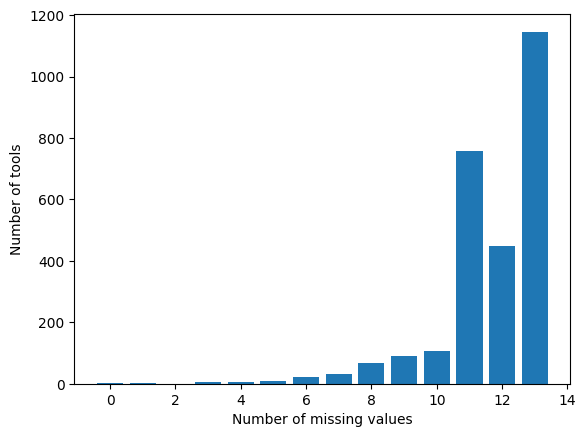

In [15]:
# Fabulous!  Now I can finally visualize the data!  
# (Incidentally, the sum of the values given above is 2702, i.e., equal to the total # of tools.
# Therefore, I can be confident that it is working properly.)

plt.bar(plottable_data.keys(), plottable_data.values())
plt.xlabel('Number of missing values')
plt.ylabel('Number of tools')


So there are a few tools that are missing a few values, and a lot of tools that are missing a **lot** of values.  In fact, of the 16 values in the "Annotations" set, the majority of tools are missing almost all of them.  I'm not sure how meaningful that is, except that it does suggest that there's a lot of work to be done! 

I'm far more interested in the second part of the task:  finding and visualizing which fields are most frequently missing.

My objective is to take the data from Toolhub and return a dict with the following structure: `{<toolname>: <# of times that it's missing>}`
My convert_to_sorted() function will be able to manage this; I just need to write new functions that incorporate both it and aspects of `list_missing_fields()` and `build_tool_dict()`

### TODO: Which fields are most frequently missing? 

In [16]:
# Let's start with writing some functions that will work with my mock data set.  
# Or, rather, modifying the functions I already wrote.
# I can grab items from the mock data dict to assist with testing

todo_test = mock_data["results"][0]
pywiki_test = mock_data["results"][1]
pyfake_test = mock_data["results"][2]

def list_fields_from_item(item):
    """Take a dict and returns a list containing the names of keys in the nested "annotations" dict which have no value"""
    empty_fields = []
    for key in item["annotations"]:
        if key == "replaced_by" and (item["deprecated"] == False or item["annotations"]["deprecated"] == False):
            continue
        elif (key in item):
            if (item[key] == [] or item[key] == None) and (item["annotations"][key] == [] or item["annotations"][key] == None):
                        empty_fields.append(key)
        elif item["annotations"][key] == [] or item["annotations"][key] == None:
            empty_fields.append(key)
    return empty_fields

print(list_fields_from_item(todo_test)) 
# should print [ 'wikidata_qid', 'for_wikis', 'icon', 'api_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url' ]

print(list_fields_from_item(pywiki_test)) 
# should print ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']

print(list_fields_from_item(pyfake_test))  
# should print ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']

['wikidata_qid', 'for_wikis', 'icon', 'api_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url']
['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']
['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']


In [17]:
def compile_missing(data_set):
    """Takes a dict and returns a dict containing the following for each entry in the original dict: 
    <name of entry>: <list of missing fields from that entry>"""
    tool_entries = {}
    for entry in data_set:
        tool_entries[entry["name"]] = list_fields_from_item(entry)
    return tool_entries   

new_dataset = compile_missing(mock_data["results"])
print(new_dataset)

# I would expect to receive the following:
# {
#    'mm_wikidata_todo': ['wikidata_qid', 'for_wikis', 'icon', 'api_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url'],
#    'pywikibot': ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url'],
#    'pywikifake': ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']
# }


{'mm_wikidata_todo': ['wikidata_qid', 'for_wikis', 'icon', 'api_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url'], 'pywikibot': ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url'], 'pywikifake': ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']}


In [18]:
# This time I would like to sort the plottable data by the values and not the keys, 
# so that the results will be ordered from the least-often-missing value to the most-often-missing.
# So here's a function that will do that:

def sort_by_value(dataset):
    """Takes a dict and returns it sorted in ascending order by its values"""
    return dict(sorted(dataset.items(), key=lambda x:x[1]))

# I'll quickly test that, too.

sample_ages = {'Mark': 10, 'Nathaniel': 11, 'Alex': 15, 'Natalie': 14, 'Leo': 2}

print(sort_by_value(sample_ages))  # Would expect {'Leo': 2, 'Mark': 10, 'Nathaniel': 11, 'Natalie': 14, 'Alex': 15}

{'Leo': 2, 'Mark': 10, 'Nathaniel': 11, 'Natalie': 14, 'Alex': 15}


In [19]:
# And finally, the function that will iterate through the dict that I just created 
# and tally up the times that the tool names appear.
# The results will pass through the sorting function, 
# which will sort them from "least often missing" to "most often missing."

def tally_missing_fields(data):
    """Takes a dict and returns a dict that contains a count of 
    the number of times each represented key is missing its value."""
    data_plot = {}
    for key, value in data.items():
        for entry in value:
            new_key = entry
            if new_key in data_plot:
                data_plot[new_key] += 1
            else:
                data_plot[new_key] = 1
    return sort_by_value(data_plot)

print(tally_missing_fields(new_dataset))

# As I already know which fields are missing for these dict items, 
# I would expect this function call to return the following:
# { 'for_wikis': 1, 'icon': 1, 'user_docs_url': 1, 'translate_url': 1, 
#  'wikidata_qid': 3, 'api_url': 3, 'feedback_url': 3, 'privacy_policy_url': 3 }

{'for_wikis': 1, 'icon': 1, 'user_docs_url': 1, 'translate_url': 1, 'wikidata_qid': 3, 'api_url': 3, 'feedback_url': 3, 'privacy_policy_url': 3}


In [20]:
# And, finally, tie them all together with the fetch request.  

def build_missing_dict():
    """Makes a GET request to the Toolhub API and returns a dict containing the keys in the "annotations" field,
    and, for each key, a count of how many tools are missing its value."""
    url = f'{TOOLS_API_ENDPOINT}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        api_response = response.json()
        tools = api_response["results"]
        while api_response["next"]:
            api_response = requests.get(api_response["next"], headers=headers).json()
            tools.extend(api_response["results"])
        missing_entries = compile_missing(tools)
        missing_dict = tally_missing_fields(missing_entries)
        return missing_dict
    else:
        print(response.status_code)
        
missing_tool_dict = build_missing_dict()
print(missing_tool_dict)

{'tool_type': 1671, 'repository': 1893, 'user_docs_url': 1958, 'available_ui_languages': 2363, 'bugtracker_url': 2419, 'developer_docs_url': 2587, 'for_wikis': 2636, 'api_url': 2647, 'feedback_url': 2653, 'icon': 2669, 'wikidata_qid': 2679, 'translate_url': 2681, 'privacy_policy_url': 2692}


Text(0.5, 1.0, 'Fields most often missing a value')

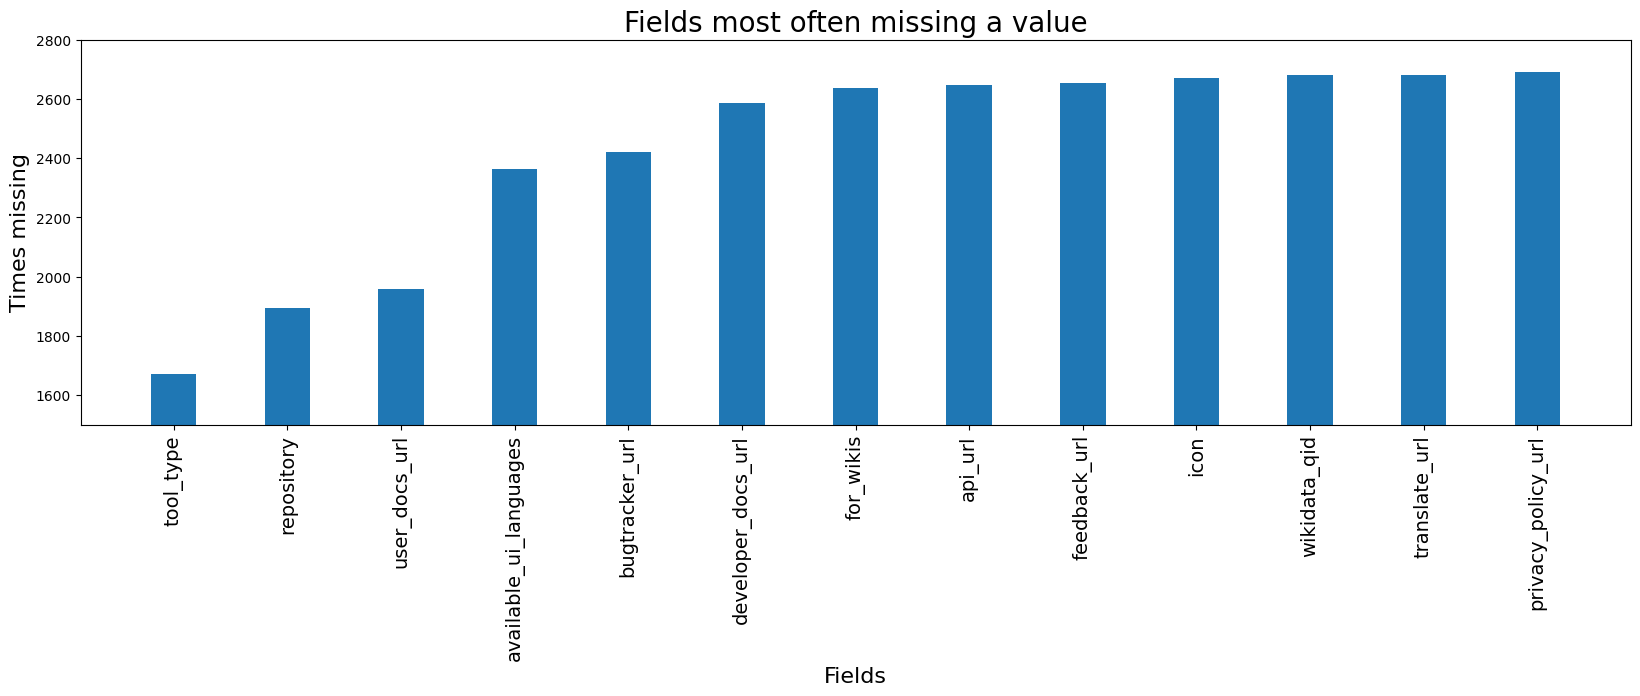

In [27]:
plt.figure(figsize=(20, 5))
plt.xticks(fontsize=14, rotation=90)
plt.ylim((1500,2800))
plt.bar(missing_tool_dict.keys(), missing_tool_dict.values(), width=0.4)
plt.xlabel('Fields', fontsize=16)
plt.ylabel('Times missing', fontsize=16)
plt.title('Fields most often missing a value', fontsize=20)

So what we have here is a very long-winded way of saying that the most missing values are:  

1. privacy_policy_url (2692 out of 2702 tools!)
2. translate_url (2681)
3. wikidata_qid (2679)
4. icon (2669)
5. feedback_url (2653)
6. api_url (2647)
7. for_wikis (2636)
8. developer_docs_url (2586)

There is very little difference between the top eight, and while the numbers decline after that, they remain high.  Even "tool_type," the "least often missing" field on the list, is still missing in 61% of tools! 

In other words, of the fields in the "Annotations" set, "deprecated" and "experimental" **always** have values (because they are automatically given a value of `False` when the tool is created) and the rest* almost **never** do.  Yikes!

\* "replaced_by" remains a special case, as my function stripped it out entirely

## Task set 3

TODO: Just as in task set 1, write a function that takes a tool name, and returns all the missing fields as a list. However this time, use the /api/search/tools endpoint.

In [22]:
def missing_fields_from_search(target):
    """Takes a tool name (string), makes a GET request to the Toolhub API /api/search/tools endpoint, 
    and returns a list of missing values for the given tool."""
    SEARCH_QUERY = "?name__startswith={}".format(target)
    url = f'{SEARCH_API_ENDPOINT}/{SEARCH_QUERY}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        api_response = response.json()
        results = api_response["results"]
        # The response from the /api/search/tools endpoint always returns multiple results
        # Therefore, I have to filter the results to pick out the matching tool entry
        tool = list(filter(lambda item: item["name"] == target, results))[0]
        # Here I can make use of the function I wrote earlier to produce a list from a single tool's dict
        return list_fields_from_item(tool)
    else:
        print(response.status_code)
        
# I can test this function based on the results of earlier searches.

print(missing_fields_from_search("pywikibot"))
# I would expect this to return ['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']

print(missing_fields_from_search("mm_wikidata_todo"))
# I would expect this to return 
# ['wikidata_qid', 'for_wikis', 'icon', 'api_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url']

['wikidata_qid', 'api_url', 'feedback_url', 'privacy_policy_url']
['wikidata_qid', 'for_wikis', 'icon', 'api_url', 'developer_docs_url', 'user_docs_url', 'feedback_url', 'privacy_policy_url', 'translate_url']


**According to you, which of the two endpoints is most suitable for retrieving missing records, and why?**

This is a question that I found more interesting the more I played with the `/api/search/tools` endpoint. I had initially thought that using `/api/tools` would be more useful for a bulk search, but discovered quite by accident that making a request to the `/api/search/tools` endpoint without adding a search parameter (or adding one that wasn't formatted properly, in my case) will return the full list of tools. The response also includes a lot of additional information, though admittedly it's the same information available in the sidebar at https://toolhub.wikimedia.org/search?ordering=-score&page=1&page_size=12

Still, if you wanted to cross-reference, say, how many tools a certain author created where the keywords value is NULL, this could be useful. But if the goal is to retrieve missing records, then that information is unnecessary.

`/api/search/tools` does have significant value if you're looking for all tools for which the values of "for_wikis," "available_ui_languages," or "tool_type" is null. If this API could be extended to handle searches for the other values in "Annotations," then it would be extremely useful for this internship task; far more useful, in fact, than `/api/tools`.

But as it stands, it doesn't offer any clear advantage over `/api/tools` for bulk record retrieval.

If you're looking for the missing records of a particular tool whose name is known exactly, `/api/tools` is the superior choice, as requests to `/api/search/tools/<toolname>` always seem to produce multiple results, which would need to be filtered.

## Implementation details

The web application will present users with small tasks, such as "This tool is missing a link to its source code, can you find one?" These tasks will be sourced from a task queue, in which the tasks are ideally ordered from most to least "important".

**TODO**: Reflect on the following questions, and try to answer them to the best of your ability. These are open-ended questions and there's likely more than one good way to do things. Explaining your reasoning and discussing the pros and cons of different approaches is more important than arriving at the "right" answer.

### Task set 4

- How should we define "important"? In other words, according to what criteria do you think priority in the task queue should be established?

I believe that the most “important” fields are those which will provide the most information to users and contributors (but especially to users).   Of the “Annotations” keys, I stand by my assertion that “repository_url” is the most valuable and should be prioritized.  Perhaps it would be possible to prioritize or suggest related tasks – so, if, for instance, a user finds and submits a value for “repository_url” the app could suggest “bugtracker_url” or “user_docs_url” for the same tool as a follow-up task for the same user (assuming that those values are also missing, which the above data suggests is more likely than not).  

Another thought: perhaps the second level of priority could go to “low hanging fruit” – questions that are likely to have a relatively easy-to-find answer.  For instance, if “repository” has a value for a particular tool, but related keys do not, the task could be flagged as higher priority and the app could offer the suggestion that the user could “check the (linked) repository” for the information.  In other words, tasks could be weighted like this:  if “bugtracker_url” == [] and “repository_url” != [], then the task has a higher priority.  

(As a side note, “wikidata_qid” seems like it could possibly fall into the category of “low hanging fruit,” but it seems to me that there must surely be a way to scrape the Wikidata entries and automatically update the values if an associated Wikidata entry is found.  Perhaps someone should write a tool…)  

To summarize, I think the first criterion should be overall usefulness and the second criterion should be tied to how likely it is that said information will be found.
  

----
  
  
- The user should have the option to skip a task and move on to the next one. A reason for skipping could be that the user tried to find the requested information, but failed. Do you think we should gather this information, for instance by having the user check a box indicating their "skip reason" before being able to click skip? What other possible skip reasons could you think of. Could this information be useful when deciding which tasks to show to which users, when to show a given task again, etc.?

I think it that such an option would be useful, though I don’t think that it should be mandatory – i.e., that the user must check a box before being allowed to skip.  (This is more of a personal preference, because I hate it when sites do that.)    Other skip reasons I could think of would simply be that the user decided that they didn’t have time to look, or weren’t interested in the particular tool, or lost interest for some other reason – reasons like that, however, don’t strike me as particularly useful for the purpose of task prioritization.   

I’m imagining a checkbox next to a “skip” button that’s labeled “Information could not be found” (or something along those lines); if checked, perhaps that could flag the task, with the result that the task would be pushed further down the queue.  If we’re aware that certain information simply doesn’t exist (i.e., there simply is no “privacy_policy_url” then it is a waste of time to keep showing it.     

The one thing that would concern me (and this is another reason why I wouldn’t want to demand that a box be checked) is the possibility of false negatives – of a user casually checking the box without having actually looked for the information.  Perhaps it would be better to set a certain threshold – say, if a task is flagged 2 or more times, then it gets pushed down.  Or the task queue could simply be weighted to preference tasks that didn’t have any flags, and the more flags a task gets, the further down it drops.  

The question of which tasks to show to which users is an interesting one.  Perhaps some users really would be more interested in searching for particular items.  A checkbox that indicates “I am not interested in this task” is a little too vague to be useful and would need to be followed up with a lot of questions; my preference would be to explicitly ask users, perhaps as part of registration for the app, if there are particular fields that they would like to search for.
  
 
 ----
  
  
- If more than one user is connected to the application and working on tasks at the same time, how would you make sure they are not presented with the same tasks?

I really have no idea if this would be feasible, but my first thought is to imagine setting a timestamp on a task when it’s called up from the queue – something like, “last_accessed_at.”  When someone loads the web app the first task is taken from the queue  - but before it’s sent to the client, the value of the timestamp is checked against the current time.  If the difference between those values is too small (I don’t know what a reasonable window would be – 30 minutes?  An hour?) then the task will be returned to the queue and the next task evaluated along the same lines.  

If we wanted to over-complicate matters, “skipping” the task could reset the timestamp, as we’d know that it was no longer actively being worked on.  (Obviously if a task was completed it would be removed from the queue entirely, and the presence and value of the flag wouldn’t matter.)  I wouldn’t want the task’s status to rest entirely on the “skip,” however – what if the user just closes their browser window?    The task will need to return to circulation on its own somehow.  (Which is why I favor the idea of evaluating a timestamp as opposed to setting something like a “currently_in_use” flag.)
